# COVID-19 Automated Data Pipeline

**Context:** This notebook implements an automated ETL (Extract, Transform, Load) pipeline. It fetches live data from the *Our World in Data* repository, filters for specific strategic countries, and applies a rolling average algorithm to visualize long-term infection trends.

**Data Source:** [Our World in Data GitHub](https://github.com/owid/covid-19-data)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime

# Visual Configuration
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

# Parameters
COUNTRIES = ['France', 'United States', 'Russia', 'South Africa']
# UPDATED LINK: Using the raw GitHub link which is more stable
DATA_URL = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

print("Libraries imported and configuration set.")

Libraries imported and configuration set.


In [5]:
def load_data(url):
    """
    Fetches live data from the remote source.
    Optimization: Only loads 'location', 'date', and 'new_cases' columns to minimize RAM usage.
    """
    print(f"Downloading data from {url}...")
    try:
        # Optimization: usecols reduces memory footprint significantly
        df = pd.read_csv(url, usecols=['location', 'date', 'new_cases'])
        df['date'] = pd.to_datetime(df['date'])
        print(f"Data loaded successfully. {df.shape[0]} rows retrieved.")
        return df
    except Exception as e:
        print(f"Download Error: {e}")
        return None

# Execute Load
df_raw = load_data(DATA_URL)
df_raw.head()

Data loaded successfully. 429435 rows retrieved.


,location,date,new_cases
0,Afghanistan,2020-01-05,0.0
1,Afghanistan,2020-01-06,0.0
2,Afghanistan,2020-01-07,0.0
3,Afghanistan,2020-01-08,0.0
4,Afghanistan,2020-01-09,0.0


In [6]:
def process_data(df, countries):
    """
    1. Filters dataset for selected countries.
    2. Sorts by date to ensure chronological order.
    3. Calculates a 7-day Rolling Average to smooth out daily volatility (weekend gaps).
    """
    # Filter
    df_filtered = df[df['location'].isin(countries)].copy()
    
    # Sort
    df_filtered = df_filtered.sort_values(by=['location', 'date'])
    
    # Calculate Rolling Average (Window = 7 days)
    # .transform keeps the original index structure
    df_filtered['rolling_cases'] = df_filtered.groupby('location')['new_cases'].transform(lambda x: x.rolling(7).mean())
    
    return df_filtered

df_clean = process_data(df_raw, COUNTRIES)
df_clean.tail()

,location,date,new_cases,rolling_cases
405120,United States,2024-07-31,NaN,NaN
405121,United States,2024-08-01,NaN,NaN
405122,United States,2024-08-02,NaN,NaN
405123,United States,2024-08-03,NaN,NaN
405124,United States,2024-08-04,NaN,NaN


Plot saved as 'covid_trends.png'


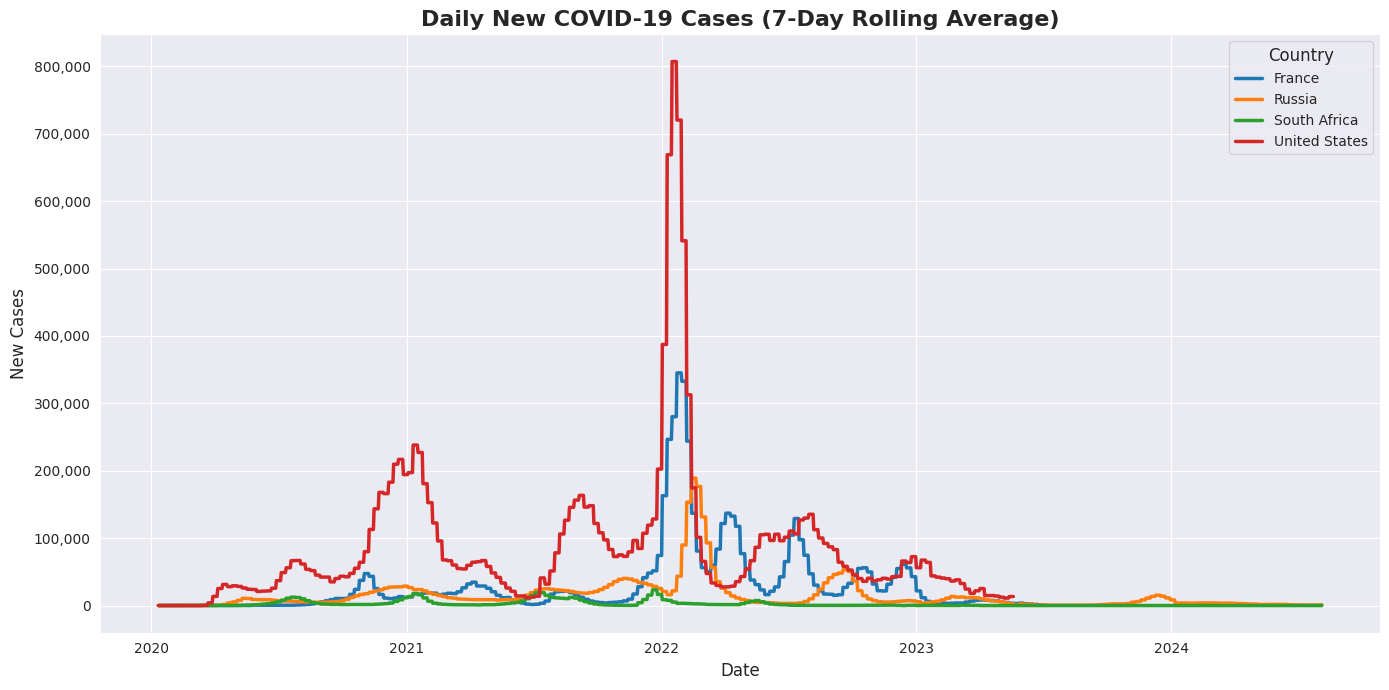

In [8]:
def plot_data(df):
    plt.figure(figsize=(14, 7))
    
    # Plotting with Seaborn
    sns.lineplot(data=df, x='date', y='rolling_cases', hue='location', linewidth=2.5, palette="tab10")
    
    # Aesthetics (English Labels)
    plt.title('Daily New COVID-19 Cases (7-Day Rolling Average)', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('New Cases', fontsize=12)
    plt.legend(title='Country', title_fontsize='12', fontsize='10')
    
    # Axis Formatting (Adds commas: 100,000 instead of 100000)
    plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    
    # Save for Portfolio/README
    plt.tight_layout()
    plt.savefig('covid_trends.png', dpi=300)
    print("Plot saved as 'covid_trends.png'")
    
    plt.show()

# Run Visualization
plot_data(df_clean)